In [1]:
%matplotlib widget

import warnings
warnings.filterwarnings('ignore')

import os
import glob
import astropy.units as u
from astropy.coordinates import SkyCoord
from sunpy.map import Map
from sunpy.net import Fido, attrs as a
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

plt.rcParams['figure.figsize'] = [7,7]
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.format'] = 'png'
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'white'

data_dir = '/home/mnedal/data'
savedir = '/home/mnedal/repos/dias_work'

# os.makedirs(f'{data_dir}/png/aia/131A/runratio', exist_ok=True)
# os.makedirs(f'{data_dir}/png/aia/171A/runratio', exist_ok=True)
# os.makedirs(f'{data_dir}/png/aia/193A/runratio', exist_ok=True)
# os.makedirs(f'{data_dir}/png/aia/211A/runratio', exist_ok=True)

In [2]:
start_time = '2024-05-14T17:15:00' # '2024-05-14T17:15:00'
end_time   = '2024-05-14T20:00:00' # '2024-05-14T19:00:00'
channel = 195

# 171, 195, 284, and 304 A

In [3]:
query = (a.Time(start_time, end_time),
         # a.Instrument('SECCHI'),
         a.Instrument('EUVI'),
         a.Source('STEREO_A'),
         a.Wavelength(channel*u.angstrom),
         a.Sample(1*u.min)
         # a.Level(2)
        )

In [4]:
# stereo_a = Fido.search(a.Time("2007/3/1", "2007/3/2"), a.Instrument("EUVI"), a.Satellite("STEREO_A"), a.Source("BEACON"))

In [5]:
result = Fido.search(*query)

In [6]:
result

Start Time,End Time,Source,Instrument,Wavelength,Provider,Physobs,Wavetype,Extent Type,Size
,,,,Angstrom,,,,,Mibyte
Time,Time,str8,str6,float64[2],str3,str9,str6,str8,float64
2024-05-14 17:15:00.000,2024-05-14 17:15:08.000,STEREO_A,SECCHI,195.0 .. 195.0,SSC,intensity,NARROW,FULLDISK,-0.00098
2024-05-14 17:17:30.000,2024-05-14 17:17:38.000,STEREO_A,SECCHI,195.0 .. 195.0,SSC,intensity,NARROW,FULLDISK,-0.00098
2024-05-14 17:20:00.000,2024-05-14 17:20:08.000,STEREO_A,SECCHI,195.0 .. 195.0,SSC,intensity,NARROW,FULLDISK,-0.00098
2024-05-14 17:22:30.000,2024-05-14 17:22:38.000,STEREO_A,SECCHI,195.0 .. 195.0,SSC,intensity,NARROW,FULLDISK,-0.00098
2024-05-14 17:25:00.000,2024-05-14 17:25:08.000,STEREO_A,SECCHI,195.0 .. 195.0,SSC,intensity,NARROW,FULLDISK,-0.00098
2024-05-14 17:27:30.000,2024-05-14 17:27:38.000,STEREO_A,SECCHI,195.0 .. 195.0,SSC,intensity,NARROW,FULLDISK,-0.00098
2024-05-14 17:30:00.000,2024-05-14 17:30:08.000,STEREO_A,SECCHI,195.0 .. 195.0,SSC,intensity,NARROW,FULLDISK,-0.00098
2024-05-14 17:32:30.000,2024-05-14 17:32:38.000,STEREO_A,SECCHI,195.0 .. 195.0,SSC,intensity,NARROW,FULLDISK,-0.00098


In [7]:
stereo_query = Fido.fetch(result, path=f'{savedir}/SECCHI/{channel}A/')

Files Downloaded:   0%|          | 0/65 [00:00<?, ?file/s]

20240514_172000_n4eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20240514_171500_n4eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20240514_172500_n4eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20240514_171730_n4eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20240514_172230_n4eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20240514_172730_n4eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20240514_173000_n4eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20240514_173230_n4eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20240514_173500_n4eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20240514_173730_n4eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20240514_174000_n4eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20240514_174500_n4eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20240514_174230_n4eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20240514_174730_n4eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20240514_175000_n4eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20240514_175230_n4eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20240514_175500_n4eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20240514_175730_n4eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20240514_180000_n4eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20240514_180230_n4eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20240514_180500_n4eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20240514_181000_n4eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20240514_181230_n4eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20240514_181500_n4eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20240514_182000_n4eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20240514_181730_n4eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20240514_182230_n4eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20240514_182500_n4eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20240514_182730_n4eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20240514_183000_n4eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20240514_183230_n4eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20240514_183500_n4eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20240514_183730_n4eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20240514_184000_n4eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20240514_184230_n4eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20240514_184500_n4eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20240514_184730_n4eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20240514_185000_n4eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20240514_185230_n4eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20240514_185500_n4eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20240514_185730_n4eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20240514_190000_n4eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20240514_190230_n4eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20240514_190500_n4eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20240514_191000_n4eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20240514_191230_n4eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20240514_191500_n4eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20240514_191730_n4eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20240514_192000_n4eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20240514_192230_n4eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20240514_192500_n4eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20240514_192730_n4eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20240514_193000_n4eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20240514_193230_n4eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20240514_193500_n4eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20240514_193730_n4eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20240514_194000_n4eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20240514_194230_n4eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20240514_194500_n4eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20240514_194730_n4eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20240514_195000_n4eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20240514_195230_n4eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20240514_195500_n4eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20240514_195730_n4eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

20240514_200000_n4eua.fts:   0%|          | 0.00/8.41M [00:00<?, ?B/s]

In [ ]:
stereo_map = stereo_query[0]

sta_map = Map(stereo_map)
# sta_map.peek()

fig = plt.figure(figsize=[7,7])
ax = fig.add_subplot(111, projection=sta_map)
sta_map.plot(axes=ax)
ax.grid(False)
fig.tight_layout()
plt.show()

## Import data files

In [8]:
filenames = sorted(glob.glob(f'{savedir}/SECCHI/{channel}A/*.fts'))
stereo_maps = []
for file in filenames:
    m = Map(file)
    stereo_maps.append(m)

INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


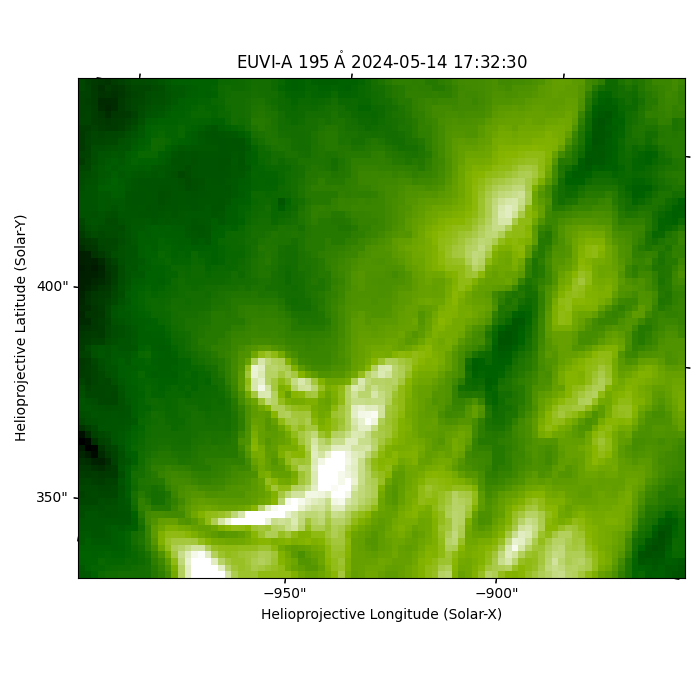

In [12]:
idx = 7
m = stereo_maps[idx]

top_right   = SkyCoord(-870*u.arcsec, 450*u.arcsec, frame=m.coordinate_frame)
bottom_left = SkyCoord(-1000*u.arcsec, 350*u.arcsec, frame=m.coordinate_frame)

m_submap = m.submap(bottom_left, top_right=top_right)

fig = plt.figure()
ax = fig.add_subplot(projection=m_submap)
img = m_submap.plot(axes=ax,
              # vmin=1e3,
              vmax=20e3,
              # clip_interval=(1, 99.999)*u.percent
             )
# fig.colorbar(img, shrink=0.5, pad=0.02)
ax.grid(False)
fig.tight_layout()
plt.show()

In [12]:
list_submaps = []
for m in stereo_maps:
    top_right   = SkyCoord(-870*u.arcsec, 550*u.arcsec, frame=m.coordinate_frame)
    bottom_left = SkyCoord(-1270*u.arcsec, 200*u.arcsec, frame=m.coordinate_frame)
    
    # top_right   = SkyCoord(-870*u.arcsec, 450*u.arcsec, frame=m.coordinate_frame)
    # bottom_left = SkyCoord(-1000*u.arcsec, 350*u.arcsec, frame=m.coordinate_frame)
    
    m_submap = m.submap(bottom_left, top_right=top_right)
    list_submaps.append(m_submap)

maps_seq = Map(list_submaps, sequence=True)

INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


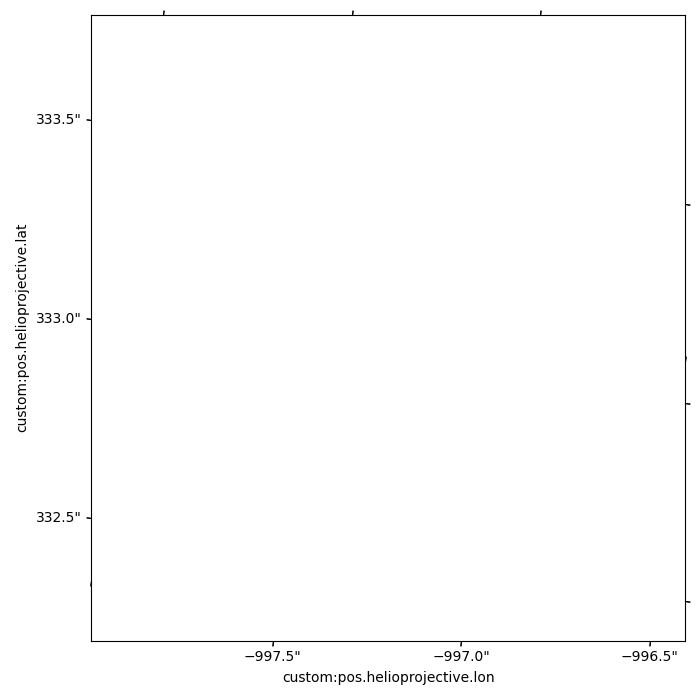

In [15]:
fig = plt.figure()
ax = fig.add_subplot(projection=maps_seq.maps[0])

def update_frame(i):
    """
    Function to update each frame of the animation.
    """
    maps_seq.maps[i].plot(axes=ax,
                          vmax=20e3,
                          # clip_interval=(1, 99.999)*u.percent
                         )
    ax.grid(False)

ani = FuncAnimation(fig, update_frame, frames=len(maps_seq.maps), repeat=False)
fig.tight_layout()
plt.show()

In [13]:
# Export the frames as PNG images
print(f'Length of the maps list: {len(maps_seq)}\n')

for i, m in enumerate(maps_seq):
    fig = plt.figure()
    ax = fig.add_subplot(projection=m)
    m.plot(axes=ax, vmax=20e3)
    ax.grid(False)
    fig.tight_layout()
    fig.savefig(f"{data_dir}/png/secchi/{channel}A/EUVI{channel}_{m.meta['date-obs']}.png", format='png', dpi=300, bbox_inches='tight')
    # fig.savefig(f"{data_dir}/png/secchi/{channel}A_zoom/EUVI{channel}_{m.meta['date-obs']}.png", format='png', dpi=300, bbox_inches='tight')
    plt.close()
    print(f"Image {i} at {m.meta['date-obs']} is done")

Length of the maps list: 65

INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
Image 0 at 2024-05-14T17:15:00.007 is done
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
Image 1 at 2024-05-14T17:17:30.007 is done
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
Image 2 at 2024-05-14T17:20:00.007 is done
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of

## Another way to download EUVI data

In [98]:
import pandas as pd

# Define the start and end datetimes
start_datetime = '2024-05-14 17:15:00'
end_datetime   = '2024-05-14 20:00:00'

# Generate the datetime range with hourly intervals
datetime_strings = pd.date_range(start=start_datetime, end=end_datetime, freq='1min').strftime('%Y-%m-%d %H:%M:%S').tolist()

# Print the resulting list
datetime_strings

['2024-05-14 17:15:00',
 '2024-05-14 17:16:00',
 '2024-05-14 17:17:00',
 '2024-05-14 17:18:00',
 '2024-05-14 17:19:00',
 '2024-05-14 17:20:00',
 '2024-05-14 17:21:00',
 '2024-05-14 17:22:00',
 '2024-05-14 17:23:00',
 '2024-05-14 17:24:00',
 '2024-05-14 17:25:00',
 '2024-05-14 17:26:00',
 '2024-05-14 17:27:00',
 '2024-05-14 17:28:00',
 '2024-05-14 17:29:00',
 '2024-05-14 17:30:00',
 '2024-05-14 17:31:00',
 '2024-05-14 17:32:00',
 '2024-05-14 17:33:00',
 '2024-05-14 17:34:00',
 '2024-05-14 17:35:00',
 '2024-05-14 17:36:00',
 '2024-05-14 17:37:00',
 '2024-05-14 17:38:00',
 '2024-05-14 17:39:00',
 '2024-05-14 17:40:00',
 '2024-05-14 17:41:00',
 '2024-05-14 17:42:00',
 '2024-05-14 17:43:00',
 '2024-05-14 17:44:00',
 '2024-05-14 17:45:00',
 '2024-05-14 17:46:00',
 '2024-05-14 17:47:00',
 '2024-05-14 17:48:00',
 '2024-05-14 17:49:00',
 '2024-05-14 17:50:00',
 '2024-05-14 17:51:00',
 '2024-05-14 17:52:00',
 '2024-05-14 17:53:00',
 '2024-05-14 17:54:00',
 '2024-05-14 17:55:00',
 '2024-05-14 17:

In [94]:
import hvpy
from sunpy.time import parse_time


start_time = '2024-05-14T17:20:00' # '2024-05-14T17:15:00'
end_time   = '2024-05-14T20:00:00' # '2024-05-14T19:00:00'
channel = 195

# 'EUVI_A_171',
# 'EUVI_A_195',
# 'EUVI_A_284',
# 'EUVI_A_304',
# 'EUVI_B_171',
# 'EUVI_B_195',
# 'EUVI_B_284',
# 'EUVI_B_304',

INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


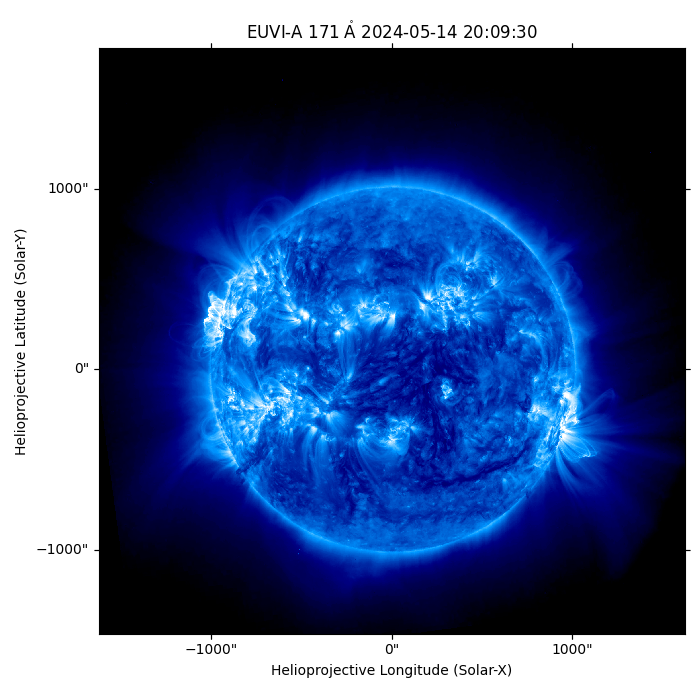

In [96]:
euvi171_file = hvpy.save_file(hvpy.getJP2Image(parse_time(end_time).datetime,
                                               hvpy.DataSource.EUVI_A_171.value),
                              f'{data_dir}/SECCHI/EUVI_171A_{start_time}.jp2', overwrite=True)

euvi171_map = Map(euvi171_file)

fig = plt.figure()
ax = fig.add_subplot(projection=euvi171_map)
euvi171_map.plot(axes=ax)
ax.grid(False)
fig.tight_layout()
plt.show()

In [ ]:
# for t in datetime_strings:
#     print(t)
#     file = hvpy.save_file(hvpy.getJP2Image(parse_time(t).datetime,
#                                            hvpy.DataSource.EUVI_A_171.value),
#                           f'{data_dir}/SECCHI/EUVI_171A_{t}.jp2', overwrite=True)
#     m = Map(file)
#     fig = plt.figure()
#     ax = fig.add_subplot(projection=m)
#     m.plot(axes=ax)
#     ax.grid(False)
#     fig.tight_layout()
#     plt.show()